# Divination Hackathon Prediction

Import some basic libraries.
* Pandas - provided data frames
* matplotlib.pyplot - plotting support

Use Magic %matplotlib to display graphics inline instead of in a popup window.


In [2]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data
import numpy as np

%matplotlib inline

## Loading and Reviewing the Data

In [3]:
df = pd.read_csv("./hackathon-data.csv")

In [4]:
df.shape

(7078, 47)

In [5]:
df.head(5)

,S/N,Joined Proctor on,Stage,Bootcamp,Score,% Score,% Completed,M1-S1 Correct,M1-S1 Wrong,M1-S1 Tries,...,M8-S1 Tries,M8-S2 Tries,M9-S1 Correct,M9-S1 Wrong,M9-S1 Tries,M9-S2 Tries,M10-S1 Correct,M10-S1 Wrong,M10-S1 Tries,M10-S2 Tries
0,1,2015-12-29,Andela Proctor,False,113,56.50%,20,3,3,3,...,0,0,0,0,0,0,0,0,0,0
1,2,2015-12-29,Andela Proctor,False,104,52.00%,13,3,3,3,...,0,0,0,0,0,0,0,0,0,0
2,3,2015-12-29,Plum.io,False,113,56.50%,100,1,5,5,...,4,0,9,10,10,0,13,30,30,1
3,4,2015-12-29,Andela Proctor,False,0,0.00%,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2015-12-29,Andela Proctor,False,0,0.00%,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.tail(5)

,S/N,Joined Proctor on,Stage,Bootcamp,Score,% Score,% Completed,M1-S1 Correct,M1-S1 Wrong,M1-S1 Tries,...,M8-S1 Tries,M8-S2 Tries,M9-S1 Correct,M9-S1 Wrong,M9-S1 Tries,M9-S2 Tries,M10-S1 Correct,M10-S1 Wrong,M10-S1 Tries,M10-S2 Tries
7073,7074,2016-03-28,Andela Proctor,False,176,88.00%,100,8,0,0,...,3,0,13,1,1,0,22,6,6,1
7074,7075,2016-02-22,Andela Proctor,False,107,53.50%,62,5,3,3,...,6,0,4,10,10,0,13,15,15,0
7075,7076,2016-06-13,Andela Proctor,False,161,80.50%,100,8,0,0,...,2,0,12,2,2,0,23,5,5,1
7076,7077,2016-05-23,Andela Proctor,False,165,82.50%,93,8,0,0,...,3,0,12,2,2,0,22,6,6,7
7077,7078,2016-09-01,Andela Proctor,False,151,75.50%,93,7,1,1,...,4,0,6,8,8,0,23,5,5,26


### Definition of features
From the metadata on the data source we have the following definition of the data columns.

Joined Proctor:
The date the user is registered on Andela Proctor platform.

Stage:
The stage the user got to. Bootcamp indicates entry to Bootcamp and Offer indicates offer into fellowship.

Bootcamp:
Whether the user made it to Bootcamp or not.

Score:
The score of the user on Proctor.

% Score:
The percentage score, which is score / 200.

% Completed:
Percentage of the curriculum that was completed.


Ma-Sb (Correct | Wrong | Tries):
M - Module
S - Section
a - Module number
b - Section number

Section 1 - Quizzes: 
The Correct/Wrong columns indicates the number the user got correctly and got wrongly respectively. Tries indicates number of attempts by the user to solve the quiz.

Section 2 - Labs:
Tries indicates the number of the times the user attempted the lab.
Labs only have number of tries unlike quizzes.

Note: 0 tries indicates the user do not attempt the quiz/lab.

Examples:
M1-S1 Correct - number of questions the user got correctly in Module 1 Section 1.
M2-S1 Wrong - number of questions the user got wrong in Module 2 Section 1.
M1-S2 Tries - number of attempts by the user to answer the questions in Module 1 Section 2.



## Check for null values

In [7]:
df.isnull().values.any()

False

### Correlated Feature Check

Helper function that displays correlation by color.  Red is most correlated, Blue least.

In [8]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


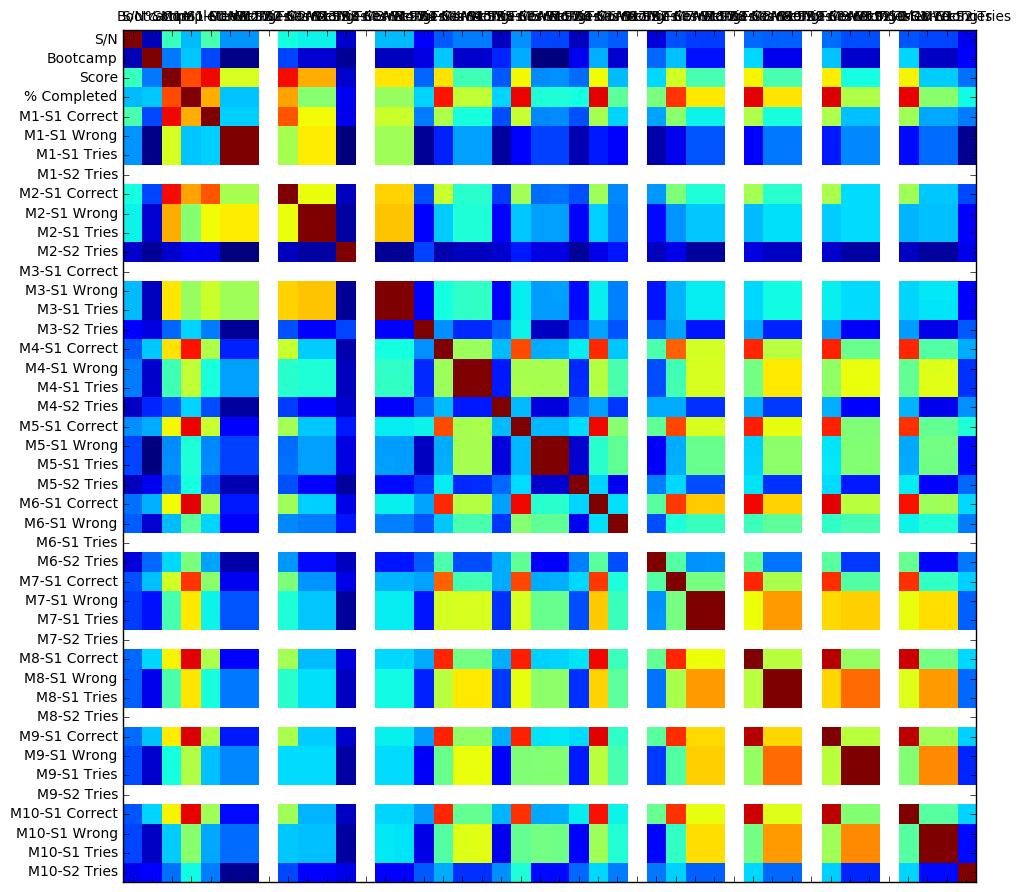

In [9]:
plot_corr(df)

In [10]:
df.corr()

,S/N,Bootcamp,Score,% Completed,M1-S1 Correct,M1-S1 Wrong,M1-S1 Tries,M1-S2 Tries,M2-S1 Correct,M2-S1 Wrong,...,M8-S1 Tries,M8-S2 Tries,M9-S1 Correct,M9-S1 Wrong,M9-S1 Tries,M9-S2 Tries,M10-S1 Correct,M10-S1 Wrong,M10-S1 Tries,M10-S2 Tries
S/N,1.000000,0.050296,0.418005,0.311434,0.439836,0.270719,0.270719,NaN,0.375611,0.365756,...,0.219062,NaN,0.232751,0.202679,0.202679,NaN,0.209650,0.194885,0.194881,0.099598
Bootcamp,0.050296,1.000000,0.243794,0.322563,0.198934,0.011089,0.011089,NaN,0.192152,0.072944,...,0.097173,NaN,0.317111,0.067467,0.067467,NaN,0.332742,0.059618,0.059602,0.116299
Score,0.418005,0.243794,1.000000,0.828956,0.901902,0.610764,0.610764,NaN,0.897635,0.722747,...,0.440783,NaN,0.658190,0.376155,0.376155,NaN,0.651325,0.326401,0.326623,0.235495
% Completed,0.311434,0.322563,0.828956,1.000000,0.725359,0.317825,0.317825,NaN,0.737040,0.514597,...,0.665213,NaN,0.918891,0.565812,0.565812,NaN,0.907993,0.516088,0.516332,0.372292
M1-S1 Correct,0.439836,0.198934,0.901902,0.725359,1.000000,0.328963,0.328963,NaN,0.820096,0.641107,...,0.379790,NaN,0.561836,0.313071,0.313071,NaN,0.543097,0.290187,0.290374,0.247924
M1-S1 Wrong,0.270719,0.011089,0.610764,0.317825,0.328963,1.000000,1.000000,NaN,0.552244,0.659561,...,0.242600,NaN,0.149616,0.259709,0.259709,NaN,0.133721,0.232083,0.232072,0.017480
M1-S1 Tries,0.270719,0.011089,0.610764,0.317825,0.328963,1.000000,1.000000,NaN,0.552244,0.659561,...,0.242600,NaN,0.149616,0.259709,0.259709,NaN,0.133721,0.232083,0.232072,0.017480
M1-S2 Tries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M2-S1 Correct,0.375611,0.192152,0.897635,0.737040,0.820096,0.552244,0.552244,NaN,1.000000,0.634790,...,0.399580,NaN,0.558557,0.343637,0.343637,NaN,0.545631,0.320975,0.321214,0.198558
M2-S1 Wrong,0.365756,0.072944,0.722747,0.514597,0.641107,0.659561,0.659561,NaN,0.634790,1.000000,...,0.347342,NaN,0.327916,0.343295,0.343295,NaN,0.301581,0.313484,0.313460,0.116317


In [11]:
df.head(5)

,S/N,Joined Proctor on,Stage,Bootcamp,Score,% Score,% Completed,M1-S1 Correct,M1-S1 Wrong,M1-S1 Tries,...,M8-S1 Tries,M8-S2 Tries,M9-S1 Correct,M9-S1 Wrong,M9-S1 Tries,M9-S2 Tries,M10-S1 Correct,M10-S1 Wrong,M10-S1 Tries,M10-S2 Tries
0,1,2015-12-29,Andela Proctor,False,113,56.50%,20,3,3,3,...,0,0,0,0,0,0,0,0,0,0
1,2,2015-12-29,Andela Proctor,False,104,52.00%,13,3,3,3,...,0,0,0,0,0,0,0,0,0,0
2,3,2015-12-29,Plum.io,False,113,56.50%,100,1,5,5,...,4,0,9,10,10,0,13,30,30,1
3,4,2015-12-29,Andela Proctor,False,0,0.00%,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2015-12-29,Andela Proctor,False,0,0.00%,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dropping the highly correlated columns.

In [12]:
del df['S/N']
del df['Joined Proctor on']
del df['M1-S1 Wrong']
del df['M2-S1 Wrong']
del df['M3-S1 Wrong']
del df['M4-S1 Wrong']
del df['M5-S1 Wrong']
del df['M6-S1 Wrong']
del df['M7-S1 Wrong']
del df['M8-S1 Wrong']
del df['M9-S1 Wrong']
del df['M10-S1 Wrong']
del df['M1-S1 Correct']
del df['M2-S1 Correct']
del df['M3-S1 Correct'] # Zero data
del df['M4-S1 Correct']
del df['M5-S1 Correct']
del df['M6-S1 Correct']
del df['M7-S1 Correct']
del df['M8-S1 Correct']
del df['M9-S1 Correct']
del df['M10-S1 Correct']
#del df['M1-S1 Tries']
#del df['M2-S1 Tries']
#del df['M3-S1 Tries']
#del df['M4-S1 Tries']
#del df['M5-S1 Tries']
del df['M6-S1 Tries'] # Zero data
#del df['M7-S1 Tries']
#del df['M8-S1 Tries']
#del df['M9-S1 Tries']
#del df['M10-S1 Tries']
del df['M1-S2 Tries'] # Zero data
#del df['M2-S2 Tries']
#del df['M3-S2 Tries']
#del df['M4-S2 Tries']
#del df['M5-S2 Tries']
#del df['M6-S2 Tries']
del df['M7-S2 Tries'] # Zero data
del df['M8-S2 Tries'] # Zero data
del df['M9-S2 Tries'] # Zero data
#del df['M10-S2 Tries']
del df['% Score']
#del df['Score']
del df['% Completed']

In [13]:
df.head(5)

,Stage,Bootcamp,Score,M1-S1 Tries,M2-S1 Tries,M2-S2 Tries,M3-S1 Tries,M3-S2 Tries,M4-S1 Tries,M4-S2 Tries,M5-S1 Tries,M5-S2 Tries,M6-S2 Tries,M7-S1 Tries,M8-S1 Tries,M9-S1 Tries,M10-S1 Tries,M10-S2 Tries
0,Andela Proctor,False,113,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Andela Proctor,False,104,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Plum.io,False,113,5,7,0,6,1,10,1,3,1,1,4,4,10,30,1
3,Andela Proctor,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Andela Proctor,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Check for additional correlations

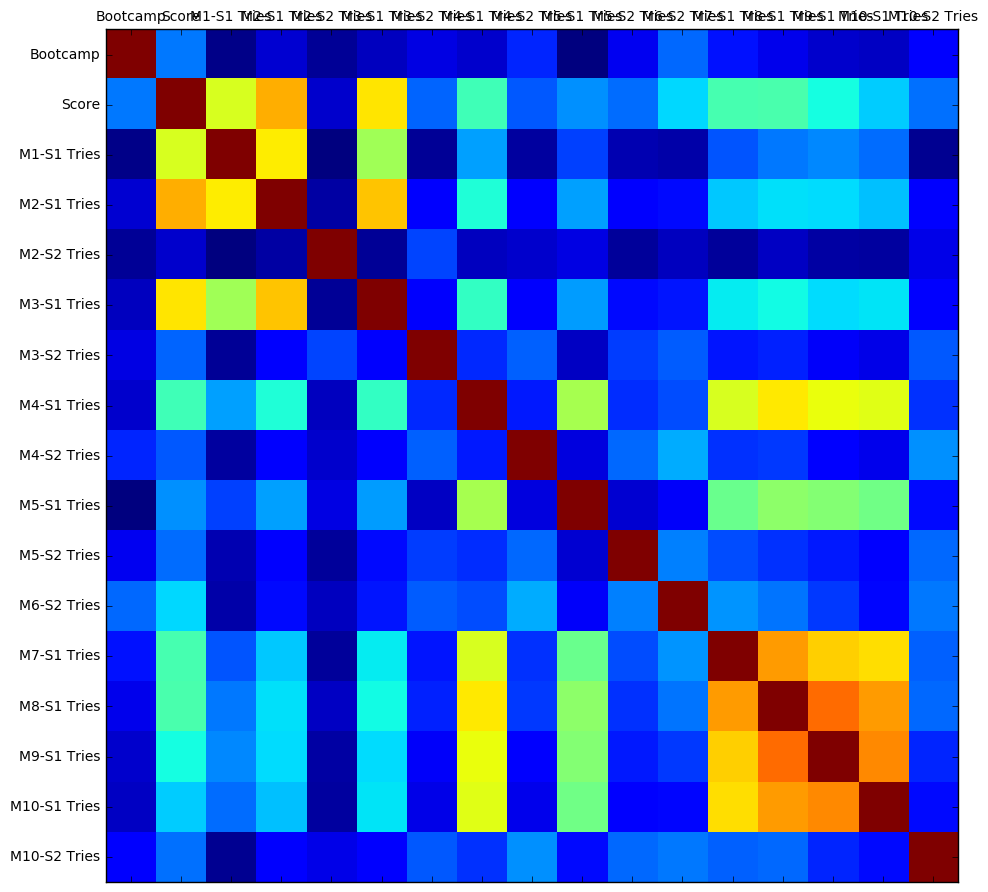

In [14]:
plot_corr(df)

Number of correlated columns highly reduced. (Perhaps remove more? Consider)

## Mold Data

### Data Types

Inspect data types to see if there are any issues.  Data should be numeric.

In [15]:
df.head(5)

,Stage,Bootcamp,Score,M1-S1 Tries,M2-S1 Tries,M2-S2 Tries,M3-S1 Tries,M3-S2 Tries,M4-S1 Tries,M4-S2 Tries,M5-S1 Tries,M5-S2 Tries,M6-S2 Tries,M7-S1 Tries,M8-S1 Tries,M9-S1 Tries,M10-S1 Tries,M10-S2 Tries
0,Andela Proctor,False,113,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Andela Proctor,False,104,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Plum.io,False,113,5,7,0,6,1,10,1,3,1,1,4,4,10,30,1
3,Andela Proctor,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Andela Proctor,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Change boolean to integer, True=1, False=0

Change Stage to integer, 'Offer'=0, everything else is 0

Remove irrelevant columns 'Joined Proctor on' and 'S/N'

Remove % sign from '% Score' column

In [16]:
bootcamp_map = {True : 1, False : 0}
df['Bootcamp'] = df['Bootcamp'].map(bootcamp_map)

#stage_map = { 
#    'n/a': 0, 'Plum.io': 1, 'Andela Proctor': 2, 'Application Review': 3, 'Unqualified Candidates': 4, 
#    'Admissions Committee': 5, 'Face to Face': 6, 'Bootcamp Scheduling': 7, 'Bootcamp Week 1': 8, 
#    'Cut from Bootcamp Week 1': 8, 'Dropped out of Bootcamp': 9, 'Boot Camp Week 2': 10, 'Pre- Fellowship': 11, 
#    'Offer': 12
#}
stage_map = { 
    'n/a': 0, 'Plum.io': 0, 'Andela Proctor': 0, 'Application Review': 0, 'Unqualified Candidates': 0, 
    'Admissions Committee': 0, 'Face to Face': 0, 'Bootcamp Scheduling': 0, 'Bootcamp Week 1': 0, 
    'Cut from Bootcamp Week 1': 0, 'Dropped out of Bootcamp': 0, 'Boot Camp Week 2': 0, 'Pre- Fellowship': 0, 
    'Offer': 1
}
df['Stage'] = df['Stage'].map(stage_map)

# del df['Joined Proctor on']
# del df['S/N']

# def cut_it(x):
#     return float(x[:-1])
# df['% Score'] = df['% Score'].map(cut_it)

Verify that all data is now numeric

In [17]:
df.head(5)

,Stage,Bootcamp,Score,M1-S1 Tries,M2-S1 Tries,M2-S2 Tries,M3-S1 Tries,M3-S2 Tries,M4-S1 Tries,M4-S2 Tries,M5-S1 Tries,M5-S2 Tries,M6-S2 Tries,M7-S1 Tries,M8-S1 Tries,M9-S1 Tries,M10-S1 Tries,M10-S2 Tries
0,0,0,113,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,104,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,113,5,7,0,6,1,10,1,3,1,1,4,4,10,30,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Check for null values

In [18]:
df.isnull().values.any()

False

No obvious null values.

### Check class distribution 

Rare events are hard to predict

In [19]:
num_applied = len(df)
num_bootcamp = len(df.loc[df['Bootcamp'] == 1])
num_accepted = len(df.loc[df['Stage'] == 1])
num_not_accepted = len(df.loc[df['Stage']== 0])
print("Number of Bootcampers:  {0} ({1:2.2f}%)".format(num_bootcamp, (num_bootcamp/num_applied) * 100))
print("Number of Accepted Applicants:  {0} ({1:2.2f}%)".format(num_accepted, (num_accepted/num_applied) * 100))
print("Number of Rejected Applicants: {0} ({1:2.2f}%)".format(num_not_accepted, (num_not_accepted/num_applied) * 100))

Number of Bootcampers:  125 (1.77%)
Number of Accepted Applicants:  30 (0.42%)
Number of Rejected Applicants: 7048 (99.58%)


In [20]:
df = df[df.Bootcamp != 0]

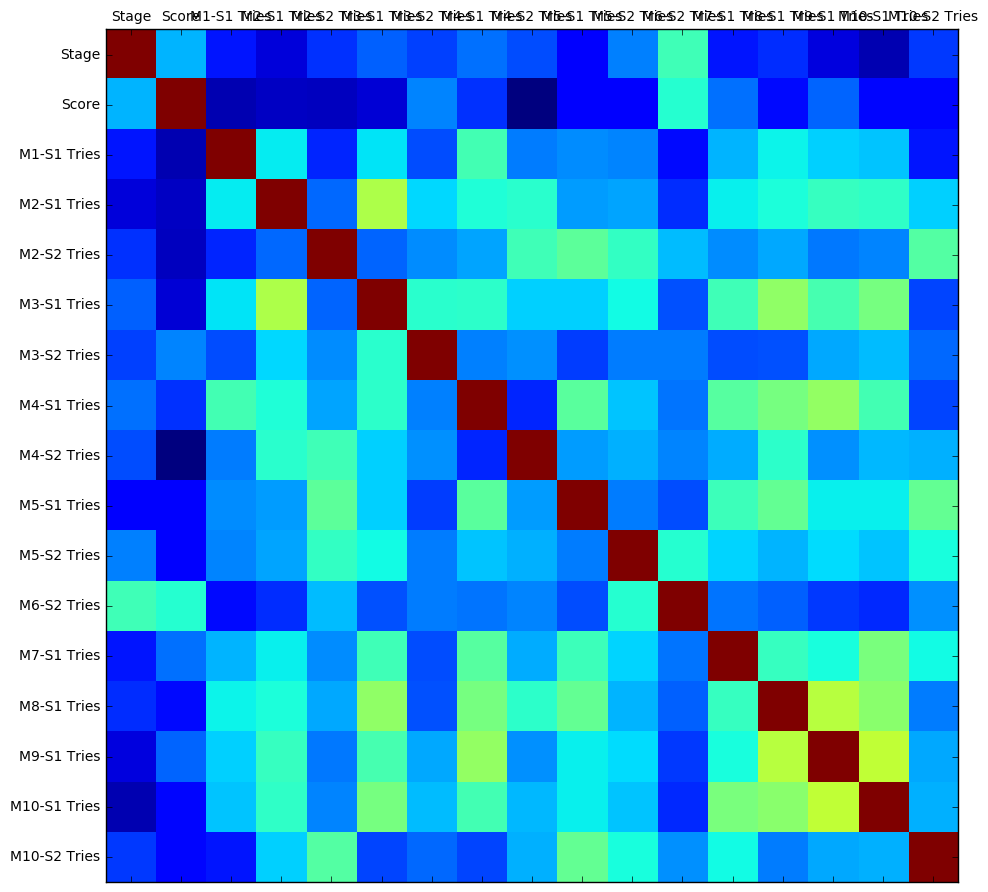

In [21]:
del df['Bootcamp']
plot_corr(df)

## Save pre-processed dataframe for later use

In [22]:
df.to_pickle("./hackathon-data-processed.p")

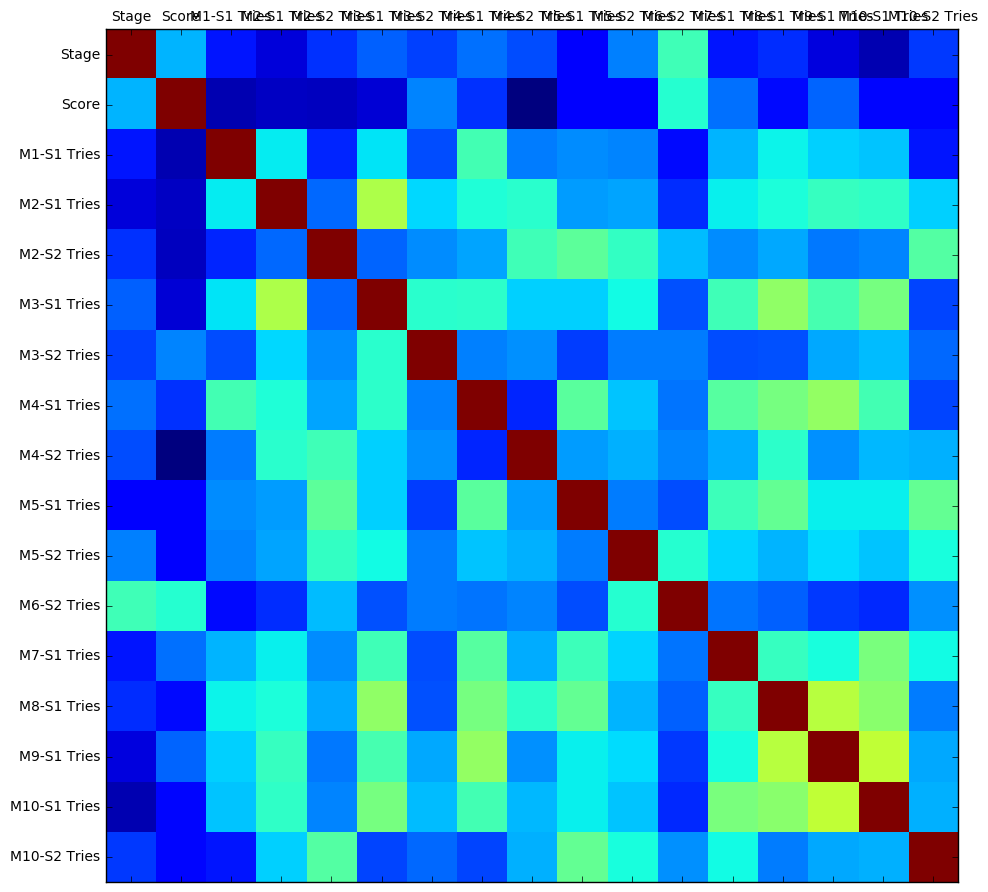

In [23]:
plot_corr(df)

In [24]:
# del df['Score']

In [25]:
# Get an array of the column names
np.asarray(df.corr().columns)

array(['Stage', 'Score', 'M1-S1 Tries', 'M2-S1 Tries', 'M2-S2 Tries',
       'M3-S1 Tries', 'M3-S2 Tries', 'M4-S1 Tries', 'M4-S2 Tries',
       'M5-S1 Tries', 'M5-S2 Tries', 'M6-S2 Tries', 'M7-S1 Tries',
       'M8-S1 Tries', 'M9-S1 Tries', 'M10-S1 Tries', 'M10-S2 Tries'], dtype=object)

### Spliting the data 

70% for training, 30% for testing

In [26]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Score', 'M1-S1 Tries', 'M2-S1 Tries', 'M2-S2 Tries',
       'M3-S1 Tries', 'M3-S2 Tries', 'M4-S1 Tries', 'M4-S2 Tries',
       'M5-S1 Tries', 'M5-S2 Tries', 'M6-S2 Tries', 'M7-S1 Tries',
       'M8-S1 Tries', 'M9-S1 Tries', 'M10-S1 Tries', 'M10-S2 Tries']
# feature_col_names = ['Bootcamp', 'Score', '% Completed']
predicted_class_names = ['Stage']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.50

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 

split_train_size = 0.50
X_test_1, X_test_2, y_test_1, y_test_2 = train_test_split(X_test, y_test, train_size=split_train_size, random_state=42) 

                            # test_size = 0.3 is 30%, 42 is the answer to everything

In [27]:
# Check to ensure we have the the desired 70% train, 30% test split of the data

print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set 1".format((len(X_test_1)/len(df.index)) * 100))

print("{0:0.2f}% in test set 2".format((len(X_test_2)/len(df.index)) * 100))

49.60% in training set
24.80% in test set 1
25.60% in test set 2


In [28]:
# Verify predicted value was split evenly

print("Original Accepted  : {0} ({1:0.2f}%)".format(len(df.loc[df['Stage'] == 1]), (len(df.loc[df['Stage'] == 1])/len(df.index)) * 100.0))
print("Original Rejected : {0} ({1:0.2f}%)".format(len(df.loc[df['Stage'] == 0]), (len(df.loc[df['Stage'] == 0])/len(df.index)) * 100.0))
print("")
print("Training Accepted  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training Rejected : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test 1 Accepted      : {0} ({1:0.2f}%)".format(len(y_test_1[y_test_1[:] == 1]), (len(y_test_1[y_test_1[:] == 1])/len(y_test_1) * 100.0)))
print("Test 1 Rejected     : {0} ({1:0.2f}%)".format(len(y_test_1[y_test_1[:] == 0]), (len(y_test_1[y_test_1[:] == 0])/len(y_test_1) * 100.0)))
print("")
print("Test 2 Accepted      : {0} ({1:0.2f}%)".format(len(y_test_2[y_test_2[:] == 1]), (len(y_test_2[y_test_2[:] == 1])/len(y_test_2) * 100.0)))
print("Test 2 Rejected     : {0} ({1:0.2f}%)".format(len(y_test_2[y_test_2[:] == 0]), (len(y_test_2[y_test_2[:] == 0])/len(y_test_2) * 100.0)))

Original Accepted  : 30 (24.00%)
Original Rejected : 95 (76.00%)

Training Accepted  : 18 (29.03%)
Training Rejected : 44 (70.97%)

Test 1 Accepted      : 4 (12.90%)
Test 1 Rejected     : 27 (87.10%)

Test 2 Accepted      : 8 (25.00%)
Test 2 Rejected     : 24 (75.00%)


## Training Initial Algorithm - Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

### Performance on Training Data

In [30]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.5161



### Performance on Testing Data

In [31]:
# predict values using the testing data
nb_predict_test_1 = nb_model.predict(X_test_1)
nb_predict_test_2 = nb_model.predict(X_test_2)

from sklearn import metrics

# training metrics
print("Accuracy Test Sample 1: {0:.4f}".format(metrics.accuracy_score(y_test_1, nb_predict_test_1)))
print("Accuracy Test Sample 2: {0:.4f}".format(metrics.accuracy_score(y_test_2, nb_predict_test_2)))
print()

Accuracy Test Sample 1: 0.3871
Accuracy Test Sample 2: 0.4375



#### Metrics

In [32]:
print("Confusion Matrix - Test Sample 1")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test_1, nb_predict_test_1, labels=[1, 0])))
print("")

print("Classification Report - Test Sample 1")
print(metrics.classification_report(y_test_1, nb_predict_test_1, labels=[1,0]))


Confusion Matrix - Test Sample 1
[[ 3  1]
 [18  9]]

Classification Report - Test Sample 1
             precision    recall  f1-score   support

          1       0.14      0.75      0.24         4
          0       0.90      0.33      0.49        27

avg / total       0.80      0.39      0.45        31



In [33]:
print("Confusion Matrix - Test Sample 2")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test_2, nb_predict_test_2, labels=[1, 0])))
print("")

print("Classification Report - Test Sample 2")
print(metrics.classification_report(y_test_2, nb_predict_test_2, labels=[1,0]))


Confusion Matrix - Test Sample 2
[[ 6  2]
 [16  8]]

Classification Report - Test Sample 2
             precision    recall  f1-score   support

          1       0.27      0.75      0.40         8
          0       0.80      0.33      0.47        24

avg / total       0.67      0.44      0.45        32



## Training Alternate Algorithm - Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

### Predict Training Data

In [35]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9677


### Predict Test Data

In [36]:
rf_predict_test_1 = rf_model.predict(X_test_1)
rf_predict_test_2 = rf_model.predict(X_test_2)

# training metrics
print("Accuracy - Test Sample 1: {0:.4f}".format(metrics.accuracy_score(y_test_1, rf_predict_test_1)))
print("Accuracy - Test Sample 2: {0:.4f}".format(metrics.accuracy_score(y_test_2, rf_predict_test_2)))

Accuracy - Test Sample 1: 0.8065
Accuracy - Test Sample 2: 0.6250


### Metrics

In [37]:
print(metrics.confusion_matrix(y_test_1, rf_predict_test_1, labels=[1, 0]) )
print("")
print("Classification Report - Test Sample 1")
print(metrics.classification_report(y_test_1, rf_predict_test_1, labels=[1,0]))

[[ 1  3]
 [ 3 24]]

Classification Report - Test Sample 1
             precision    recall  f1-score   support

          1       0.25      0.25      0.25         4
          0       0.89      0.89      0.89        27

avg / total       0.81      0.81      0.81        31



In [38]:
print(metrics.confusion_matrix(y_test_2, rf_predict_test_2, labels=[1, 0]) )
print("")
print("Classification Report - Test Sample 2")
print(metrics.classification_report(y_test_2, rf_predict_test_2, labels=[1,0]))

[[ 1  7]
 [ 5 19]]

Classification Report - Test Sample 2
             precision    recall  f1-score   support

          1       0.17      0.12      0.14         8
          0       0.73      0.79      0.76        24

avg / total       0.59      0.62      0.61        32



## Logistic Regression

In [44]:

from sklearn import linear_model

# Create linear regression object
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train.ravel())
linear.score(X_train, y_train)
#Equation coefficient and Intercept
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
#Predict Output
predicted= linear.predict(X_test_1)
print("Classification Report - Test Sample 1")
print(metrics.classification_report(y_test_1, predicted, labels=[1,0]))

Coefficient: 
 [-0.00131713 -0.02362754  0.00950391 -0.11585902  0.02925672 -0.01663043
  0.06349376  0.07606879 -0.15066574 -0.00562986  0.06974185 -0.0484076
  0.00283864 -0.01884507 -0.03870592 -0.07582714]
Intercept: 
 0.48913830913
Classification Report - Test Sample 1


ValueError: Mix type of y not allowed, got types {'continuous', 'binary'}

In [389]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test_1 = lr_model.predict(X_test_1)


# training metrics
print("Accuracy - Test Sample 1: {0:.4f}".format(metrics.accuracy_score(y_test_1, lr_predict_test_1)))
print(metrics.confusion_matrix(y_test_1, lr_predict_test_1, labels=[1, 0]) )
print("")
print("Classification Report - Test Sample 1")
print(metrics.classification_report(y_test_1, lr_predict_test_1, labels=[1,0]))

Accuracy - Test Sample 1: 0.8065
[[ 1  3]
 [ 3 24]]

Classification Report - Test Sample 1
             precision    recall  f1-score   support

          1       0.25      0.25      0.25         4
          0       0.89      0.89      0.89        27

avg / total       0.81      0.81      0.81        31



In [390]:
lr_predict_test_2 = lr_model.predict(X_test_2)


# training metrics
print("Accuracy - Test Sample 2: {0:.4f}".format(metrics.accuracy_score(y_test_2, lr_predict_test_2)))
print(metrics.confusion_matrix(y_test_2, lr_predict_test_2, labels=[1, 0]) )
print("")
print("Classification Report - Test Sample 2")
print(metrics.classification_report(y_test_2, lr_predict_test_2, labels=[1,0]))

Accuracy - Test Sample 2: 0.7188
[[ 1  7]
 [ 2 22]]

Classification Report - Test Sample 2
             precision    recall  f1-score   support

          1       0.33      0.12      0.18         8
          0       0.76      0.92      0.83        24

avg / total       0.65      0.72      0.67        32



1st max value of 0.250 occured at C=0.100


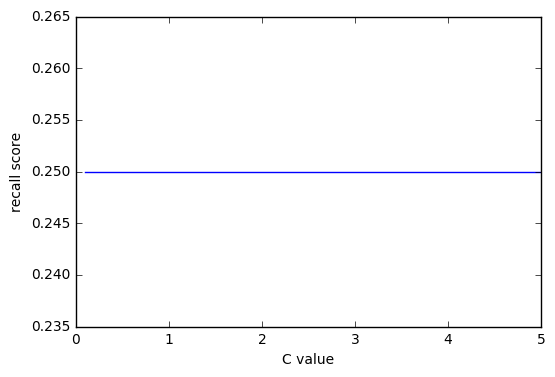

In [395]:
# Find the best regularisation parameter
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test_1)
    recall_score = metrics.recall_score(y_test_1, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")